<a href="https://colab.research.google.com/github/Motilipz/PW_Skills/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [85]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=10,
                           random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize a Bagging Classifier with Decision Trees as base estimators
# n_estimators: The number of base estimators (Decision Trees) in the ensemble
# random_state: For reproducibility
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,  # Use 100 Decision Trees
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# 4. Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9167


Q22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [86]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 1. Create a sample regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=20,
                               n_informative=10, n_targets=1,
                               random_state=42)

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 2. Initialize a Bagging Regressor with Decision Trees as base estimators
bagging_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,  # Use 100 Decision Trees
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Train the Bagging Regressor
bagging_reg.fit(X_train_reg, y_train_reg)

# 3. Make predictions on the test set
y_pred_reg = bagging_reg.predict(X_test_reg)

# 4. Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 9284.4126


Q23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [87]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target
feature_names = breast_cancer.feature_names

# Split the dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# 2. Initialize a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the classifier
rf_clf.fit(X_train_bc, y_train_bc)

# 3. Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame for better visualization of feature importances
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# 4. Print feature importance scores
print("Feature Importance Scores (Random Forest Classifier on Breast Cancer Dataset):\n")
print(feature_importances_df)

Feature Importance Scores (Random Forest Classifier on Breast Cancer Dataset):

                    feature  importance
27     worst concave points    0.158955
23               worst area    0.146962
22          worst perimeter    0.085793
20             worst radius    0.078952
0               mean radius    0.077714
2            mean perimeter    0.074234
7       mean concave points    0.065869
6            mean concavity    0.054281
3                 mean area    0.041657
26          worst concavity    0.031362
25        worst compactness    0.024985
13               area error    0.019936
24         worst smoothness    0.014164
21            worst texture    0.013599
5          mean compactness    0.013177
28           worst symmetry    0.012647
10             radius error    0.011605
29  worst fractal dimension    0.009073
4           mean smoothness    0.008625
12          perimeter error    0.008540
1              mean texture    0.008158
19  fractal dimension error    0.006145


Q24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [88]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 1. Create a sample regression dataset
X_compare, y_compare = make_regression(n_samples=1000, n_features=20,
                                         n_informative=10, n_targets=1,
                                         random_state=42)

# Split the dataset into training and testing sets
X_train_compare, X_test_compare, y_train_compare, y_test_compare = train_test_split(X_compare, y_compare, test_size=0.3, random_state=42)

# 2. Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train_compare, y_train_compare)
y_pred_rf = rf_regressor.predict(X_test_compare)
mse_rf = mean_squared_error(y_test_compare, y_pred_rf)

# 3. Initialize and train a single Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_compare, y_train_compare)
y_pred_dt = dt_regressor.predict(X_test_compare)
mse_dt = mean_squared_error(y_test_compare, y_pred_dt)

# 4. Print and compare the performance
print(f"Mean Squared Error (Random Forest Regressor): {mse_rf:.4f}")
print(f"Mean Squared Error (Decision Tree Regressor): {mse_dt:.4f}")

if mse_rf < mse_dt:
    print("Random Forest Regressor performed better (lower MSE) than the single Decision Tree Regressor.")
elif mse_rf > mse_dt:
    print("Single Decision Tree Regressor performed better (lower MSE) than the Random Forest Regressor.")
else:
    print("Both regressors performed equally well.")

Mean Squared Error (Random Forest Regressor): 9348.5380
Mean Squared Error (Decision Tree Regressor): 21837.7538
Random Forest Regressor performed better (lower MSE) than the single Decision Tree Regressor.


Q25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset (if not already loaded in the current session)
# Assuming X_bc and y_bc are available from previous steps. If not, uncomment:
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

# It's good practice to split the data even for OOB, though OOB doesn't use the test set for its calculation.
# The OOB score is computed on the training data not seen by individual trees.
X_train_bc_oob, X_test_bc_oob, y_train_bc_oob, y_test_bc_oob = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# Initialize a Random Forest Classifier with oob_score set to True
# n_estimators: The number of trees in the forest
# random_state: For reproducibility
# oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy
rf_oob_clf = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True, n_jobs=-1)

# Train the classifier
rf_oob_clf.fit(X_train_bc_oob, y_train_bc_oob)

# Print the Out-of-Bag Score
print(f"Out-of-Bag Score (Random Forest Classifier): {rf_oob_clf.oob_score_:.4f}")

Out-of-Bag Score (Random Forest Classifier): 0.9573


Q26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [90]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Create a sample dataset (if not already available)
# Reusing the existing X and y from the kernel state for consistency if possible.
# If X and y are not defined, uncomment the lines below:
# X, y = make_classification(n_samples=1000, n_features=20,
#                            n_informative=10, n_redundant=10,
#                            random_state=42)

# Split the dataset into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize a Bagging Classifier with SVM as the base estimator
# n_estimators: The number of base estimators (SVMs) in the ensemble
# random_state: For reproducibility
bagging_svm_clf = BaggingClassifier(
    estimator=SVC(random_state=42), # Use SVC as the base estimator
    n_estimators=10,  # Using a smaller number of estimators due to SVM's higher computational cost
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Train the Bagging Classifier
bagging_svm_clf.fit(X_train_svm, y_train_svm)

# 3. Make predictions on the test set
y_pred_svm = bagging_svm_clf.predict(X_test_svm)

# 4. Calculate and print the model accuracy
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"Bagging Classifier with SVM (Accuracy): {accuracy_svm:.4f}")

Bagging Classifier with SVM (Accuracy): 0.9367


Q27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

Comparing Random Forest Classifier accuracy with different numbers of trees:

Number of Trees: 10, Accuracy: 0.9298
Number of Trees: 50, Accuracy: 0.9240
Number of Trees: 100, Accuracy: 0.9357
Number of Trees: 200, Accuracy: 0.9415
Number of Trees: 500, Accuracy: 0.9474


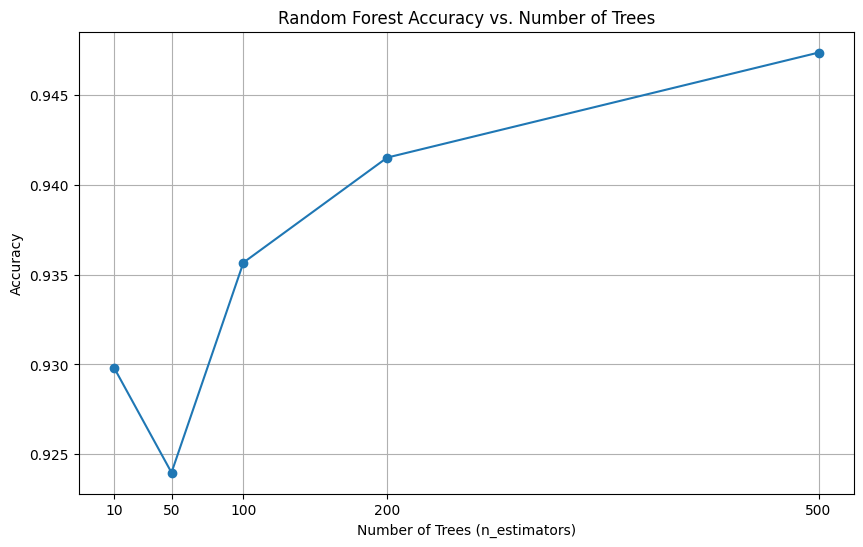

In [91]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

# Split the dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# 2. Define different numbers of trees to test
n_estimators_list = [10, 50, 100, 200, 500]
accuracies = []

print("Comparing Random Forest Classifier accuracy with different numbers of trees:\n")

# 3. Train and evaluate Random Forest Classifiers for each number of trees
for n_estimators in n_estimators_list:
    rf_clf_var = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=42,
        n_jobs=-1 # Use all available cores
    )
    rf_clf_var.fit(X_train_bc, y_train_bc)
    y_pred_var = rf_clf_var.predict(X_test_bc)
    accuracy_var = accuracy_score(y_test_bc, y_pred_var)
    accuracies.append(accuracy_var)
    print(f"Number of Trees: {n_estimators}, Accuracy: {accuracy_var:.4f}")

# Optional: Plotting the results for better visualization
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()


Q28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [92]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Split the dataset into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_lr_clf = BaggingClassifier(
    estimator=LogisticRegression(random_state=42, solver='liblinear'), # Use LogisticRegression as the base estimator
    n_estimators=50,  # Use 50 Logistic Regression models
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Train the Bagging Classifier
bagging_lr_clf.fit(X_train_lr, y_train_lr)

# Make probability predictions on the test set for AUC calculation
y_pred_proba_lr = bagging_lr_clf.predict_proba(X_test_lr)[:, 1] # Get probabilities for the positive class

# Calculate and print the AUC score
auc_score = roc_auc_score(y_test_lr, y_pred_proba_lr)
print(f"Bagging Classifier with Logistic Regression (AUC Score): {auc_score:.4f}")

Bagging Classifier with Logistic Regression (AUC Score): 0.9199


Q29. Train a Random Forest Regressor and analyze feature importance scores

In [93]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Create a sample regression dataset
X_reg_imp, y_reg_imp = make_regression(n_samples=1000, n_features=20,
                                         n_informative=10, n_targets=1,
                                         random_state=42)

# Generate generic feature names
feature_names_reg = [f'feature_{i+1}' for i in range(X_reg_imp.shape[1])]

# Split the dataset into training and testing sets
X_train_reg_imp, X_test_reg_imp, y_train_reg_imp, y_test_reg_imp = train_test_split(X_reg_imp, y_reg_imp, test_size=0.3, random_state=42)

# 2. Initialize and train a Random Forest Regressor
rf_regressor_imp = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor_imp.fit(X_train_reg_imp, y_train_reg_imp)

# 3. Get feature importances
importances_reg = rf_regressor_imp.feature_importances_

# Create a DataFrame for better visualization of feature importances
feature_importances_reg_df = pd.DataFrame({'feature': feature_names_reg, 'importance': importances_reg})
feature_importances_reg_df = feature_importances_reg_df.sort_values(by='importance', ascending=False)

# 4. Print feature importance scores
print("Feature Importance Scores (Random Forest Regressor):\n")
print(feature_importances_reg_df)

Feature Importance Scores (Random Forest Regressor):

       feature  importance
16  feature_17    0.259447
4    feature_5    0.203324
15  feature_16    0.148030
5    feature_6    0.122283
2    feature_3    0.105227
18  feature_19    0.025059
1    feature_2    0.016945
10  feature_11    0.011038
14  feature_15    0.010566
17  feature_18    0.010223
11  feature_12    0.010158
8    feature_9    0.009728
13  feature_14    0.009728
6    feature_7    0.009580
9   feature_10    0.009498
12  feature_13    0.008662
7    feature_8    0.008313
19  feature_20    0.007827
0    feature_1    0.007404
3    feature_4    0.006958


Q30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [94]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Create a sample classification dataset
X_ensemble, y_ensemble = make_classification(n_samples=1000, n_features=20,
                                         n_informative=10, n_redundant=10,
                                         random_state=42)

# Split the dataset into training and testing sets
X_train_ensemble, X_test_ensemble, y_train_ensemble, y_test_ensemble = train_test_split(X_ensemble, y_ensemble, test_size=0.3, random_state=42)

# 2. Train a Bagging Classifier (using Decision Trees as base estimators)
bagging_clf_ensemble = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100, # Use 100 Decision Trees
    random_state=42,
    n_jobs=-1
)
bagging_clf_ensemble.fit(X_train_ensemble, y_train_ensemble)
y_pred_bagging = bagging_clf_ensemble.predict(X_test_ensemble)
accuracy_bagging = accuracy_score(y_test_ensemble, y_pred_bagging)

# 3. Train a Random Forest Classifier
rf_clf_ensemble = RandomForestClassifier(
    n_estimators=100, # Use 100 Decision Trees
    random_state=42,
    n_jobs=-1
)
rf_clf_ensemble.fit(X_train_ensemble, y_train_ensemble)
y_pred_rf = rf_clf_ensemble.predict(X_test_ensemble)
accuracy_rf = accuracy_score(y_test_ensemble, y_pred_rf)

# 4. Compare and print accuracies
print(f"Accuracy of Bagging Classifier: {accuracy_bagging:.4f}")
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")

if accuracy_rf > accuracy_bagging:
    print("Random Forest Classifier performed better.")
elif accuracy_bagging > accuracy_rf:
    print("Bagging Classifier performed better.")
else:
    print("Both classifiers performed equally well.")

Accuracy of Bagging Classifier: 0.9167
Accuracy of Random Forest Classifier: 0.9133
Bagging Classifier performed better.


Q31.  Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [95]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# 2. Define the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# 3. Define the hyperparameter grid for GridSearchCV
# n_estimators: number of trees in the forest
# max_features: number of features to consider when looking for the best split
# min_samples_split: minimum number of samples required to split an internal node
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5]
}

# 4. Initialize GridSearchCV
# estimator: The estimator object to use
# param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values
# cv: Determines the cross-validation splitting strategy (e.g., 5-fold cross-validation)
# scoring: Strategy to evaluate the performance of the cross-validated model on the test set
# n_jobs: Number of jobs to run in parallel (-1 means using all processors)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 5. Run GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# 6. Print the best parameters and best score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# 7. Evaluate the best model on the test set
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best model: {accuracy:.4f}")

Best parameters found by GridSearchCV:
{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9725
Test set accuracy with best model: 0.9357


Q32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

Comparing Bagging Regressor performance with different numbers of estimators:
Number of Estimators: 10, Mean Squared Error: 10581.2727
Number of Estimators: 50, Mean Squared Error: 9168.5445
Number of Estimators: 100, Mean Squared Error: 9284.4126
Number of Estimators: 200, Mean Squared Error: 9025.6675
Number of Estimators: 500, Mean Squared Error: 8988.2472


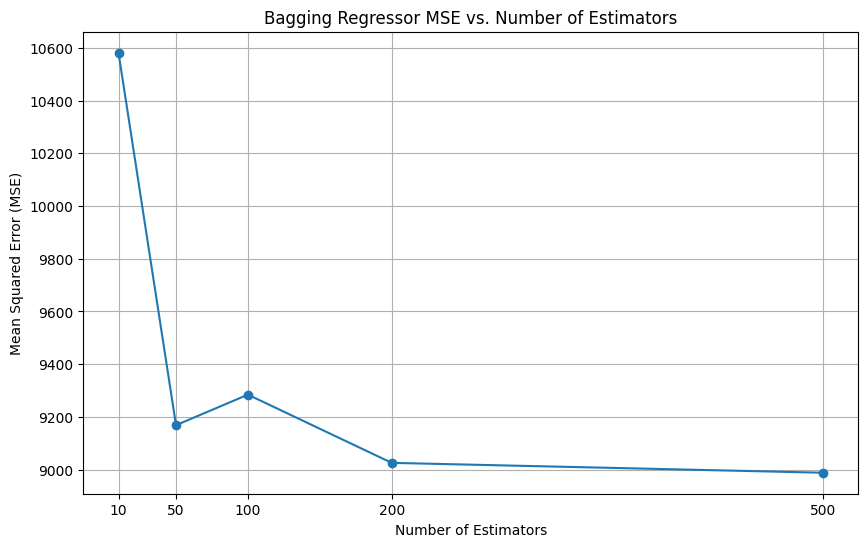

In [96]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Create a sample regression dataset
X_reg_bag, y_reg_bag = make_regression(n_samples=1000, n_features=20,
                                         n_informative=10, n_targets=1,
                                         random_state=42)

# Split the dataset into training and testing sets
X_train_reg_bag, X_test_reg_bag, y_train_reg_bag, y_test_reg_bag = train_test_split(X_reg_bag, y_reg_bag, test_size=0.3, random_state=42)

# 2. Define different numbers of base estimators (Decision Trees) to test
n_estimators_list = [10, 50, 100, 200, 500]
mse_scores = []

print("Comparing Bagging Regressor performance with different numbers of estimators:")

# 3. Train and evaluate Bagging Regressors for each number of estimators
for n_estimators in n_estimators_list:
    bagging_reg_var = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n_estimators,
        random_state=42,
        n_jobs=-1 # Use all available cores
    )
    bagging_reg_var.fit(X_train_reg_bag, y_train_reg_bag)
    y_pred_reg_var = bagging_reg_var.predict(X_test_reg_bag)
    mse_var = mean_squared_error(y_test_reg_bag, y_pred_reg_var)
    mse_scores.append(mse_var)
    print(f"Number of Estimators: {n_estimators}, Mean Squared Error: {mse_var:.4f}")

# Optional: Plotting the results for better visualization
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_scores, marker='o', linestyle='-')
plt.title('Bagging Regressor MSE vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()

Q33. Train a Random Forest Classifier and analyze misclassified samples.

In [97]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# 2. Initialize and Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}\n")

# 4. Analyze misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

print(f"Number of misclassified samples: {len(misclassified_indices)}\n")

if len(misclassified_indices) > 0:
    print("Details of Misclassified Samples:")
    # Create a DataFrame to display misclassified samples' details
    misclassified_data = {
        'Sample Index (in X_test)': misclassified_indices,
        'Actual Label': [target_names[y_test[i]] for i in misclassified_indices],
        'Predicted Label': [target_names[y_pred[i]] for i in misclassified_indices]
    }
    misclassified_df = pd.DataFrame(misclassified_data)
    print(misclassified_df)

    # Optional: Display some features of the first few misclassified samples
    if len(misclassified_indices) > 0:
        print("\nFeatures of the first 5 misclassified samples (or fewer if less than 5):")
        for i, idx in enumerate(misclassified_indices[:5]): # Take first 5 for brevity
            print(f"\nSample Index {idx} (Actual: {target_names[y_test[idx]]}, Predicted: {target_names[y_pred[idx]]}):")
            sample_features = pd.Series(X_test[idx], index=feature_names)
            print(sample_features)
else:
    print("No misclassified samples found on the test set.")


Random Forest Classifier Accuracy: 0.9357

Number of misclassified samples: 11

Details of Misclassified Samples:
    Sample Index (in X_test) Actual Label Predicted Label
0                          4    malignant          benign
1                         13    malignant          benign
2                         17       benign       malignant
3                         36       benign       malignant
4                         76       benign       malignant
5                         98    malignant          benign
6                        116    malignant          benign
7                        124    malignant          benign
8                        138    malignant          benign
9                        162       benign       malignant
10                       168       benign       malignant

Features of the first 5 misclassified samples (or fewer if less than 5):

Sample Index 4 (Actual: malignant, Predicted: benign):
mean radius                 14.480000
mean texture          

Q34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [98]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Create a sample dataset
X_compare_clf, y_compare_clf = make_classification(n_samples=1000, n_features=20,
                                             n_informative=10, n_redundant=10,
                                             random_state=42)

# Split the dataset into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_compare_clf, y_compare_clf, test_size=0.3, random_state=42)

# 2. Train a Bagging Classifier
bagging_clf_compare = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100, # Use 100 Decision Trees as base estimators
    random_state=42,
    n_jobs=-1 # Use all available cores
)
bagging_clf_compare.fit(X_train_clf, y_train_clf)
y_pred_bagging_clf = bagging_clf_compare.predict(X_test_clf)
accuracy_bagging_clf = accuracy_score(y_test_clf, y_pred_bagging_clf)

# 3. Train a single Decision Tree Classifier
dt_clf_compare = DecisionTreeClassifier(random_state=42)
dt_clf_compare.fit(X_train_clf, y_train_clf)
y_pred_dt_clf = dt_clf_compare.predict(X_test_clf)
accuracy_dt_clf = accuracy_score(y_test_clf, y_pred_dt_clf)

# 4. Compare and print the performance
print(f"Accuracy of Bagging Classifier: {accuracy_bagging_clf:.4f}")
print(f"Accuracy of single Decision Tree Classifier: {accuracy_dt_clf:.4f}")

if accuracy_bagging_clf > accuracy_dt_clf:
    print("Bagging Classifier performed better than the single Decision Tree Classifier.")
elif accuracy_dt_clf > accuracy_bagging_clf:
    print("Single Decision Tree Classifier performed better than the Bagging Classifier.")
else:
    print("Both classifiers performed equally well.")

Accuracy of Bagging Classifier: 0.9167
Accuracy of single Decision Tree Classifier: 0.8267
Bagging Classifier performed better than the single Decision Tree Classifier.


Q35. Train a Random Forest Classifier and visualize the confusion matrix.

Random Forest Classifier Accuracy: 0.9357



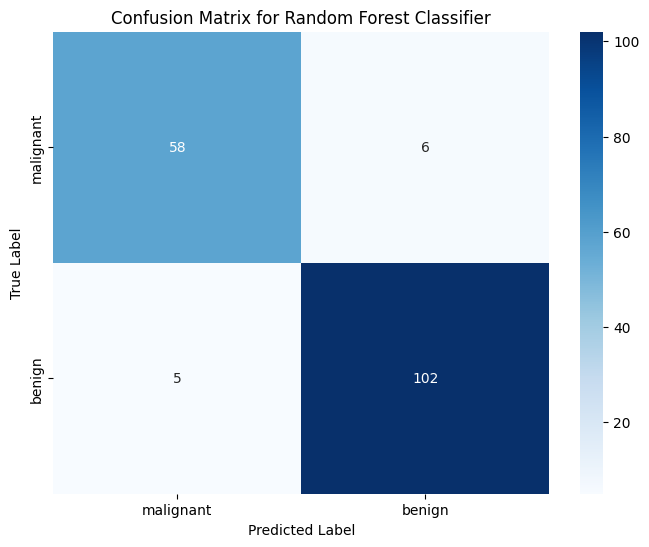

In [99]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target
target_names = breast_cancer.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# 2. Initialize and Train a Random Forest Classifier
rf_clf_cm = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_cm.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred_cm = rf_clf_cm.predict(X_test)

# Calculate accuracy
accuracy_cm = accuracy_score(y_test, y_pred_cm)
print(f"Random Forest Classifier Accuracy: {accuracy_cm:.4f}\n")

# 4. Compute the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cm)

# 5. Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Alternative visualization using ConfusionMatrixDisplay (Scikit-learn >= 0.22)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
# disp.plot(cmap='Blues')
# plt.title('Confusion Matrix for Random Forest Classifier')
# plt.show()

Q36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [100]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# 1. Create a sample classification dataset
X_stack, y_stack = make_classification(n_samples=1000, n_features=20,
                                         n_informative=10, n_redundant=10,
                                         random_state=42)

# Split the dataset into training and testing sets
X_train_stack, X_test_stack, y_train_stack, y_test_stack = train_test_split(X_stack, y_stack, test_size=0.3, random_state=42)

# 2. Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)), # SVM needs probability=True for stacking with predict_proba
    ('lr', LogisticRegression(random_state=42, solver='liblinear'))
]

# 3. Define the Stacking Classifier
# final_estimator: The meta-learner that combines the predictions of the base estimators.
# cv: Cross-validation strategy to use when fitting the base estimators.
# n_jobs: Number of jobs to run in parallel (-1 means using all processors).
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42, solver='liblinear'),
    cv=5,
    n_jobs=-1
)

# 4. Train the Stacking Classifier
print("Training Stacking Classifier...")
stacking_clf.fit(X_train_stack, y_train_stack)
y_pred_stack = stacking_clf.predict(X_test_stack)
accuracy_stack = accuracy_score(y_test_stack, y_pred_stack)
print(f"Accuracy of Stacking Classifier: {accuracy_stack:.4f}\n")

# 5. For comparison: Train a single Decision Tree Classifier (one of the base estimators)
print("Training a single Decision Tree Classifier for comparison...")
dt_clf_compare = DecisionTreeClassifier(random_state=42)
dt_clf_compare.fit(X_train_stack, y_train_stack)
y_pred_dt_compare = dt_clf_compare.predict(X_test_stack)
accuracy_dt_compare = accuracy_score(y_test_stack, y_pred_dt_compare)
print(f"Accuracy of single Decision Tree Classifier: {accuracy_dt_compare:.4f}\n")

# 6. Compare accuracies
if accuracy_stack > accuracy_dt_compare:
    print("Stacking Classifier performed better than the single Decision Tree Classifier.")
elif accuracy_dt_compare > accuracy_stack:
    print("Single Decision Tree Classifier performed better than the Stacking Classifier.")
else:
    print("Both classifiers performed equally well.")


Training Stacking Classifier...
Accuracy of Stacking Classifier: 0.9367

Training a single Decision Tree Classifier for comparison...
Accuracy of single Decision Tree Classifier: 0.8267

Stacking Classifier performed better than the single Decision Tree Classifier.


Q37. Train a Random Forest Classifier and print the top 5 most important features.

In [101]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target
feature_names = breast_cancer.feature_names

# Split the dataset into training and testing sets (though not strictly needed for feature importance, good practice)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# 2. Initialize and Train a Random Forest Classifier
rf_clf_imp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_imp.fit(X_train_bc, y_train_bc)

# 3. Get feature importances
importances = rf_clf_imp.feature_importances_

# Create a DataFrame for better visualization of feature importances
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# 4. Print the top 5 most important features
print("Top 5 Most Important Features (Random Forest Classifier on Breast Cancer Dataset):")
print(feature_importances_df.head(5))

Top 5 Most Important Features (Random Forest Classifier on Breast Cancer Dataset):
                 feature  importance
27  worst concave points    0.158955
23            worst area    0.146962
22       worst perimeter    0.085793
20          worst radius    0.078952
0            mean radius    0.077714


Q38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [102]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# 1. Create a sample classification dataset
X_bag_metrics, y_bag_metrics = make_classification(n_samples=1000, n_features=20,
                                                 n_informative=10, n_redundant=10,
                                                 random_state=42)

# Split the dataset into training and testing sets
X_train_bag_metrics, X_test_bag_metrics, y_train_bag_metrics, y_test_bag_metrics = train_test_split(
    X_bag_metrics, y_bag_metrics, test_size=0.3, random_state=42, stratify=y_bag_metrics
)

# 2. Initialize a Bagging Classifier with Decision Trees as base estimators
bagging_clf_metrics = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,  # Use 100 Decision Trees
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Train the Bagging Classifier
bagging_clf_metrics.fit(X_train_bag_metrics, y_train_bag_metrics)

# 3. Make predictions on the test set
y_pred_bag_metrics = bagging_clf_metrics.predict(X_test_bag_metrics)

# 4. Calculate and print the performance metrics
accuracy = accuracy_score(y_test_bag_metrics, y_pred_bag_metrics)
precision = precision_score(y_test_bag_metrics, y_pred_bag_metrics)
recall = recall_score(y_test_bag_metrics, y_pred_bag_metrics)
f1 = f1_score(y_test_bag_metrics, y_pred_bag_metrics)

print(f"Bagging Classifier Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Bagging Classifier Performance Metrics:
Accuracy: 0.9000
Precision: 0.8797
Recall: 0.9267
F1-Score: 0.9026


Q39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

Comparing Random Forest Classifier accuracy with different max_depth values:

Max Depth: 2, Accuracy: 0.9298
Max Depth: 5, Accuracy: 0.9415
Max Depth: 10, Accuracy: 0.9357
Max Depth: 15, Accuracy: 0.9357
Max Depth: 20, Accuracy: 0.9357
Max Depth: None, Accuracy: 0.9357


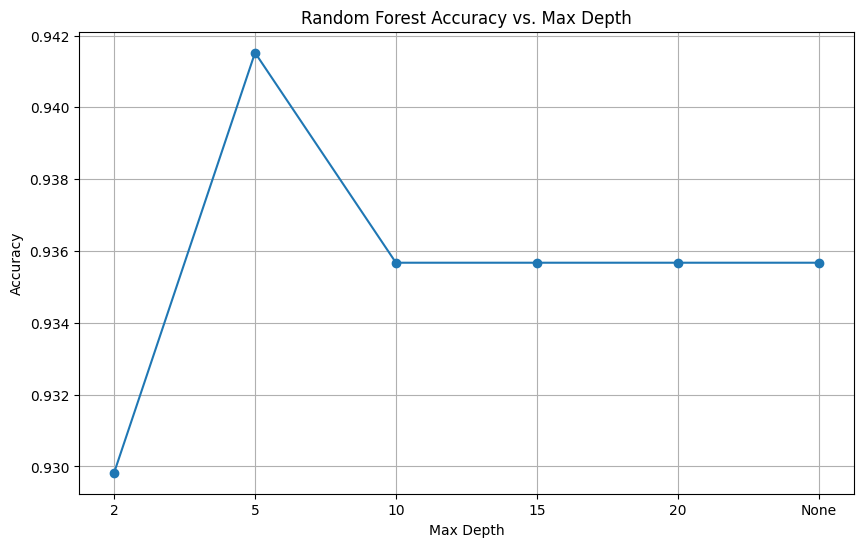

In [103]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

# Split the dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# 2. Define a list of max_depth values to test
max_depth_list = [2, 5, 10, 15, 20, None] # None means unlimited depth
accuracies = []

print("Comparing Random Forest Classifier accuracy with different max_depth values:\n")

# 3. Train and evaluate Random Forest Classifiers for each max_depth
for depth in max_depth_list:
    rf_clf_depth = RandomForestClassifier(
        n_estimators=100, # Keep n_estimators constant for this analysis
        max_depth=depth,
        random_state=42,
        n_jobs=-1 # Use all available cores
    )
    rf_clf_depth.fit(X_train_bc, y_train_bc)
    y_pred_depth = rf_clf_depth.predict(X_test_bc)
    accuracy_depth = accuracy_score(y_test_bc, y_pred_depth)
    accuracies.append(accuracy_depth)
    depth_str = 'None' if depth is None else str(depth)
    print(f"Max Depth: {depth_str}, Accuracy: {accuracy_depth:.4f}")

# Optional: Plotting the results for better visualization
plt.figure(figsize=(10, 6))
depth_labels = [str(d) if d is not None else 'None' for d in max_depth_list]
plt.plot(depth_labels, accuracies, marker='o', linestyle='-')
plt.title('Random Forest Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Q40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

In [104]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Create a sample regression dataset
X_reg_base, y_reg_base = make_regression(n_samples=1000, n_features=20,
                                         n_informative=10, n_targets=1,
                                         random_state=42)

# Split the dataset into training and testing sets
X_train_reg_base, X_test_reg_base, y_train_reg_base, y_test_reg_base = train_test_split(X_reg_base, y_reg_base, test_size=0.3, random_state=42)

print("Comparing Bagging Regressor performance with different base estimators:\n")

# 2. Bagging Regressor with Decision Tree as base estimator
print("Training Bagging Regressor with Decision Tree...")
bagging_dt_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,  # Number of base estimators
    random_state=42,
    n_jobs=-1
)
bagging_dt_reg.fit(X_train_reg_base, y_train_reg_base)
y_pred_dt_bag = bagging_dt_reg.predict(X_test_reg_base)
mse_dt_bag = mean_squared_error(y_test_reg_base, y_pred_dt_bag)
print(f"Mean Squared Error (Bagging with Decision Tree): {mse_dt_bag:.4f}\n")

# 3. Bagging Regressor with K-Neighbors Regressor as base estimator
# Note: KNeighborsRegressor can be computationally intensive, n_estimators might be kept lower if needed.
print("Training Bagging Regressor with K-Neighbors Regressor...")
bagging_knn_reg = BaggingRegressor(
    estimator=KNeighborsRegressor(n_neighbors=5), # K-Neighbors Regressor with default 5 neighbors
    n_estimators=10,  # Using fewer estimators due to KNN's potential higher computation time
    random_state=42,
    n_jobs=-1
)
bagging_knn_reg.fit(X_train_reg_base, y_train_reg_base)
y_pred_knn_bag = bagging_knn_reg.predict(X_test_reg_base)
mse_knn_bag = mean_squared_error(y_test_reg_base, y_pred_knn_bag)
print(f"Mean Squared Error (Bagging with K-Neighbors Regressor): {mse_knn_bag:.4f}\n")

# 4. Compare performance
if mse_dt_bag < mse_knn_bag:
    print("Bagging Regressor with Decision Tree performed better (lower MSE).")
elif mse_knn_bag < mse_dt_bag:
    print("Bagging Regressor with K-Neighbors Regressor performed better (lower MSE).")
else:
    print("Both Bagging Regressors performed equally well.")

Comparing Bagging Regressor performance with different base estimators:

Training Bagging Regressor with Decision Tree...
Mean Squared Error (Bagging with Decision Tree): 9284.4126

Training Bagging Regressor with K-Neighbors Regressor...
Mean Squared Error (Bagging with K-Neighbors Regressor): 17479.3828

Bagging Regressor with Decision Tree performed better (lower MSE).


Q41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

Random Forest Classifier ROC-AUC Score: 0.9913


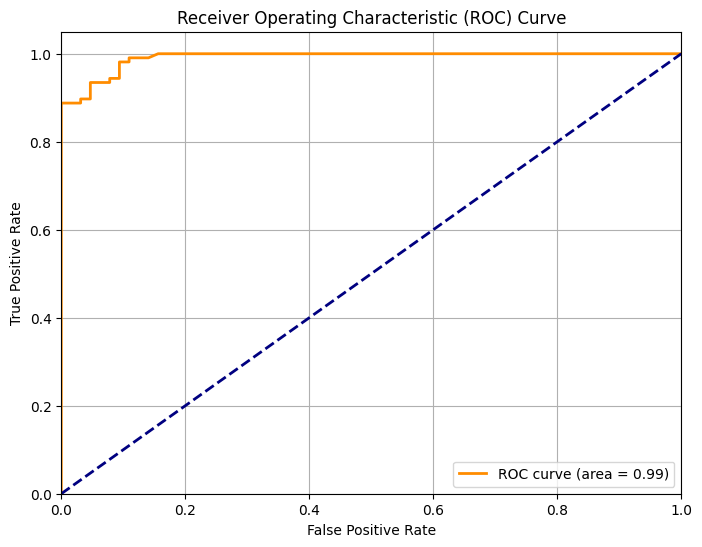

In [105]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

# Split the dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# 2. Initialize and Train a Random Forest Classifier
rf_clf_roc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_roc.fit(X_train_bc, y_train_bc)

# 3. Make probability predictions on the test set
# We need probabilities for the positive class (class 1) to compute ROC AUC
y_pred_proba_roc = rf_clf_roc.predict_proba(X_test_bc)[:, 1]

# 4. Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(y_test_bc, y_pred_proba_roc)
print(f"Random Forest Classifier ROC-AUC Score: {roc_auc:.4f}")

# Optional: Plotting the ROC curve for better visualization
fpr, tpr, thresholds = roc_curve(y_test_bc, y_pred_proba_roc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Q42. Train a Bagging Classifier and evaluate its performance using cross-validation

In [106]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Create a sample classification dataset
X_cv, y_cv = make_classification(n_samples=1000, n_features=20,
                                 n_informative=10, n_redundant=10,
                                 random_state=42)

# 2. Initialize a Bagging Classifier with Decision Trees as base estimators
bagging_clf_cv = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,  # Use 100 Decision Trees
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# 3. Define the cross-validation strategy
# KFold splits the dataset into k consecutive folds (without shuffling by default).
# shuffle=True shuffles the data before splitting.
# random_state for reproducibility.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Perform cross-validation and print the scores
# scoring='accuracy' is the default for classification. Other options include 'precision', 'recall', 'f1', 'roc_auc'
cv_scores = cross_val_score(bagging_clf_cv, X_cv, y_cv, cv=kf, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation scores (Accuracy) for Bagging Classifier: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}")

Cross-validation scores (Accuracy) for Bagging Classifier: [0.95  0.925 0.885 0.905 0.885]
Mean CV Accuracy: 0.9100
Standard Deviation of CV Accuracy: 0.0249


Q43. Train a Random Forest Classifier and plot the Precision-Recall curve

Random Forest Classifier Precision-Recall AUC: 0.9949


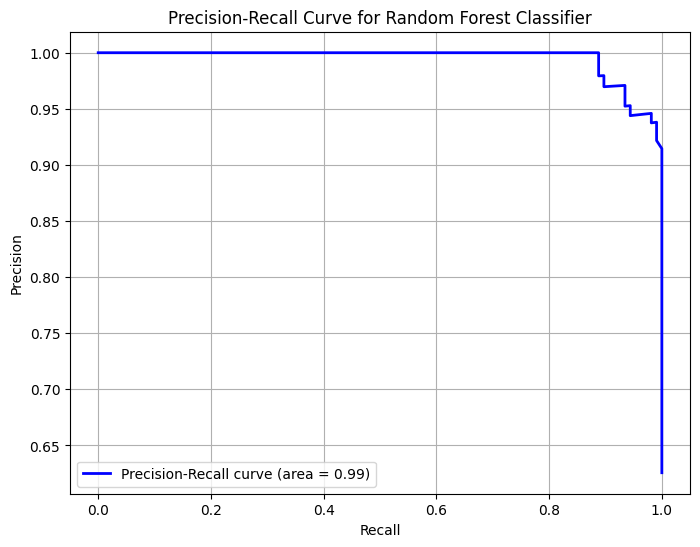

In [107]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

# Split the dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

# 2. Initialize and Train a Random Forest Classifier
rf_clf_pr = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_pr.fit(X_train_bc, y_train_bc)

# 3. Make probability predictions on the test set for the positive class
y_scores_pr = rf_clf_pr.predict_proba(X_test_bc)[:, 1]

# 4. Compute Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test_bc, y_scores_pr)
pr_auc = auc(recall, precision)

print(f"Random Forest Classifier Precision-Recall AUC: {pr_auc:.4f}")

# 5. Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Q44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [108]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Create a sample classification dataset
X_stack_rf_lr, y_stack_rf_lr = make_classification(n_samples=1000, n_features=20,
                                                 n_informative=10, n_redundant=10,
                                                 random_state=42)

# Split the dataset into training and testing sets
X_train_stack_rf_lr, X_test_stack_rf_lr, y_train_stack_rf_lr, y_test_stack_rf_lr = train_test_split(
    X_stack_rf_lr, y_stack_rf_lr, test_size=0.3, random_state=42
)

# 2. Define base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('lr', LogisticRegression(random_state=42, solver='liblinear'))
]

# 3. Define the Stacking Classifier
stacking_clf_rf_lr = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42, solver='liblinear'), # Meta-learner
    cv=5,
    n_jobs=-1
)

# 4. Train the Stacking Classifier
print("Training Stacking Classifier (Random Forest + Logistic Regression)...")
stacking_clf_rf_lr.fit(X_train_stack_rf_lr, y_train_stack_rf_lr)
y_pred_stack_rf_lr = stacking_clf_rf_lr.predict(X_test_stack_rf_lr)
accuracy_stack_rf_lr = accuracy_score(y_test_stack_rf_lr, y_pred_stack_rf_lr)
print(f"Accuracy of Stacking Classifier: {accuracy_stack_rf_lr:.4f}\n")

# 5. Train individual Random Forest Classifier for comparison
print("Training a single Random Forest Classifier for comparison...")
rf_clf_compare = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_compare.fit(X_train_stack_rf_lr, y_train_stack_rf_lr)
y_pred_rf_compare = rf_clf_compare.predict(X_test_stack_rf_lr)
accuracy_rf_compare = accuracy_score(y_test_stack_rf_lr, y_pred_rf_compare)
print(f"Accuracy of single Random Forest Classifier: {accuracy_rf_compare:.4f}\n")

# 6. Train individual Logistic Regression Classifier for comparison
print("Training a single Logistic Regression Classifier for comparison...")
lr_clf_compare = LogisticRegression(random_state=42, solver='liblinear', n_jobs=-1)
lr_clf_compare.fit(X_train_stack_rf_lr, y_train_stack_rf_lr)
y_pred_lr_compare = lr_clf_compare.predict(X_test_stack_rf_lr)
accuracy_lr_compare = accuracy_score(y_test_stack_rf_lr, y_pred_lr_compare)
print(f"Accuracy of single Logistic Regression Classifier: {accuracy_lr_compare:.4f}\n")

# 7. Compare accuracies
print("Comparing all classifier accuracies:")
print(f"  Stacking Classifier: {accuracy_stack_rf_lr:.4f}")
print(f"  Random Forest Classifier: {accuracy_rf_compare:.4f}")
print(f"  Logistic Regression Classifier: {accuracy_lr_compare:.4f}")

if accuracy_stack_rf_lr > max(accuracy_rf_compare, accuracy_lr_compare):
    print("\nStacking Classifier performed best.")
elif accuracy_rf_compare > accuracy_lr_compare:
    print("\nRandom Forest Classifier performed best.")
else:
    print("\nLogistic Regression Classifier performed best.")

Training Stacking Classifier (Random Forest + Logistic Regression)...
Accuracy of Stacking Classifier: 0.8967

Training a single Random Forest Classifier for comparison...
Accuracy of single Random Forest Classifier: 0.9133

Training a single Logistic Regression Classifier for comparison...
Accuracy of single Logistic Regression Classifier: 0.8567

Comparing all classifier accuracies:
  Stacking Classifier: 0.8967
  Random Forest Classifier: 0.9133
  Logistic Regression Classifier: 0.8567

Random Forest Classifier performed best.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Q45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

Comparing Bagging Regressor performance with different levels of bootstrap samples:
Max Samples: 0.1, Mean Squared Error: 15292.3073
Max Samples: 0.5, Mean Squared Error: 10248.3408
Max Samples: 0.7, Mean Squared Error: 9674.2443
Max Samples: 1.0, Mean Squared Error: 9284.4126


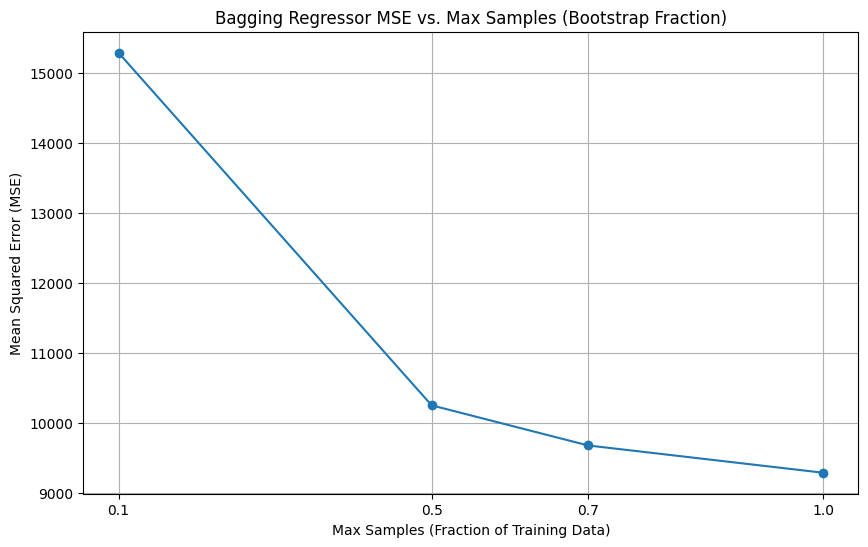

In [109]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Create a sample regression dataset
X_reg_bootstrap, y_reg_bootstrap = make_regression(n_samples=1000, n_features=20,
                                                 n_informative=10, n_targets=1,
                                                 random_state=42)

# Split the dataset into training and testing sets
X_train_reg_bootstrap, X_test_reg_bootstrap, y_train_reg_bootstrap, y_test_reg_bootstrap = train_test_split(X_reg_bootstrap, y_reg_bootstrap, test_size=0.3, random_state=42)

# 2. Define different levels of bootstrap samples (max_samples)
# max_samples can be an int (number of samples) or float (fraction of samples)
max_samples_list = [0.1, 0.5, 0.7, 1.0] # Fractions of the total training samples
mse_scores = []

print("Comparing Bagging Regressor performance with different levels of bootstrap samples:")

# 3. Train and evaluate Bagging Regressors for each max_samples value
for max_samples in max_samples_list:
    bagging_reg_bootstrap = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=100,  # Keep n_estimators constant for this analysis
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1 # Use all available cores
    )
    bagging_reg_bootstrap.fit(X_train_reg_bootstrap, y_train_reg_bootstrap)
    y_pred_reg_bootstrap = bagging_reg_bootstrap.predict(X_test_reg_bootstrap)
    mse_var = mean_squared_error(y_test_reg_bootstrap, y_pred_reg_bootstrap)
    mse_scores.append(mse_var)
    print(f"Max Samples: {max_samples}, Mean Squared Error: {mse_var:.4f}")

# Optional: Plotting the results for better visualization
plt.figure(figsize=(10, 6))
plt.plot(max_samples_list, mse_scores, marker='o', linestyle='-')
plt.title('Bagging Regressor MSE vs. Max Samples (Bootstrap Fraction)')
plt.xlabel('Max Samples (Fraction of Training Data)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(max_samples_list)
plt.grid(True)
plt.show()